
Import the Library





In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, ConfusionMatrixDisplay

Mount the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/titanic/train.csv"
df = pd.read_csv(path)

Mounted at /content/drive


Display the first few rows of the dataset

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check for missing values in the dataset

In [4]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Drop the 'Cabin' column due to excessive missing values

In [5]:
df=df.drop(['Cabin'],axis=1)

Fill missing values in 'Age' with mean age and 'Embarked' with mode

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-6-f3c0c36ea331>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-6-f3c0c36ea331>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Verify missing values again

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Encode categorical features into numerical values

In [8]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Display dataset information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


Drop 'Ticket' column as it is not useful for modeling

In [10]:
df=df.drop(['Ticket'],axis=1)

Extract titles from names to create a new feature

In [12]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

 Map titles to simplified categories

In [14]:
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master', 'Dr': 'Rare',
    'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare', 'Mlle': 'Miss', 'Ms': 'Miss',
    'Mme': 'Mrs', 'Capt': 'Rare', 'Countess': 'Rare', 'Jonkheer': 'Rare', 'Don': 'Rare',
    'Lady': 'Rare', 'Sir': 'Rare'
}
df['Title'] = df['Title'].map(title_mapping)

Handle missing values in 'Title' based on gender and age

In [15]:
def assign_title(row):
    if pd.isnull(row['Title']):
        if row['Sex'] == 0:
            return 'Mr'
        elif row['Sex'] == 0 and row['Age'] < 18:
            return 'Miss'
        elif row['Sex'] == 1 and row['Age'] >= 18:
            return 'Mrs'
    else:
        return row['Title']

Apply function to fill missing titles

In [16]:
df['Title'] = df.apply(assign_title, axis=1)

 Encode 'Title' into numeric categories

In [17]:
df['Title'] = df['Title'].map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Rare': 4})

Drop 'Name' as it is no longer needed

In [18]:
df.drop(['Name'], axis=1, inplace=True)

Plot correlation heatmap to understand feature relationships

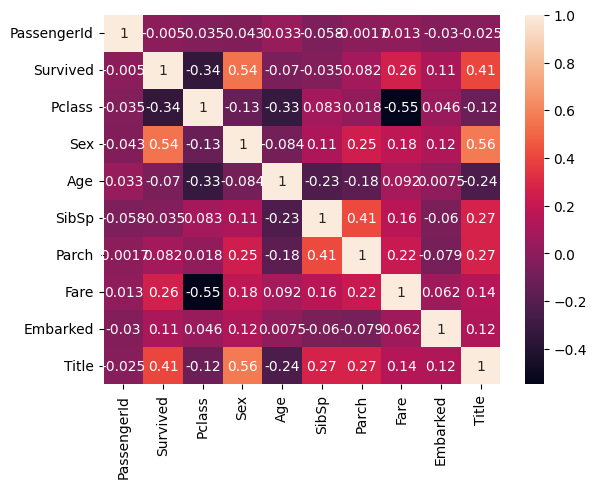

In [19]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Drop 'PassengerId' as it is not useful for modeling

In [20]:
df.drop(['PassengerId'], axis=1, inplace=True)

Check the devaition of the instances

In [21]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392,0.794613
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673,1.076519
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,4.000000


Initialize and apply MinMaxScaler to scale 'Fare'

In [22]:
scaler = MinMaxScaler()
df['Fare_Scaled'] = scaler.fit_transform(df[['Fare']])

Check the updated devation

In [23]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fare_Scaled
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.361392,0.794613,0.062858
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673,1.076519,0.096995
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.015440
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,2.000000,0.060508
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,4.000000,1.000000


Drop original 'Fare' column as it is replaced by scaled version

In [24]:
df.drop(['Fare'], axis=1, inplace=True)

Plot histogrms of numeric features split by survival status

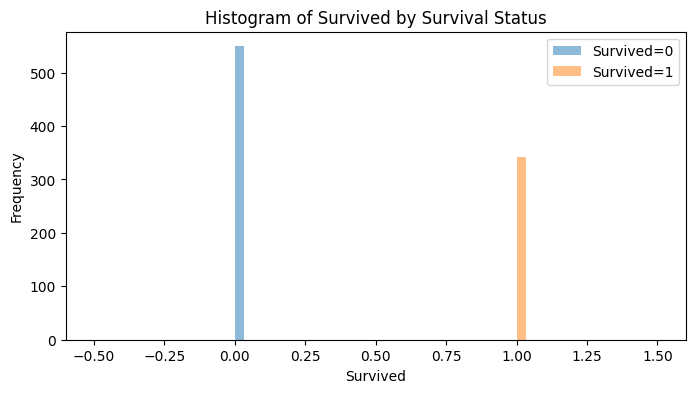

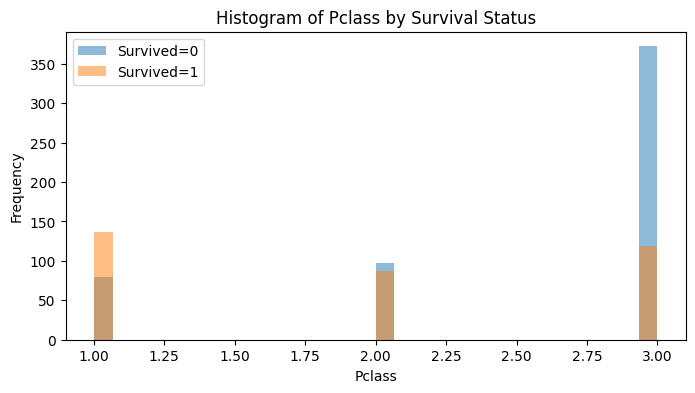

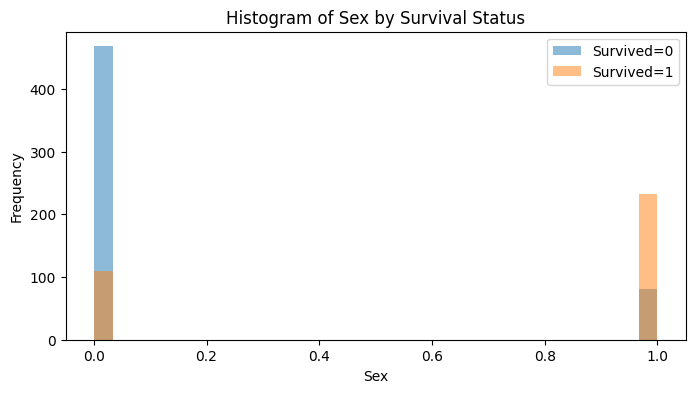

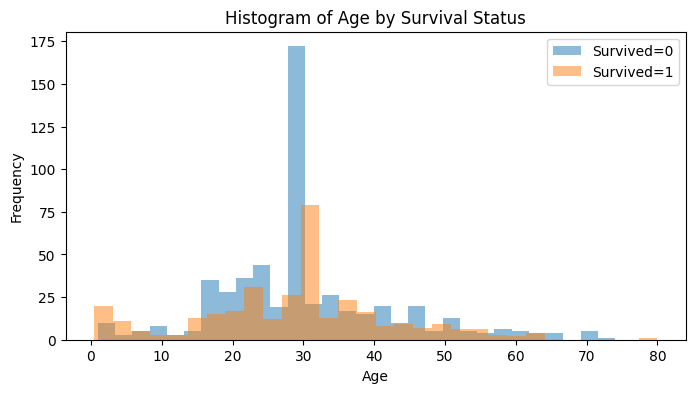

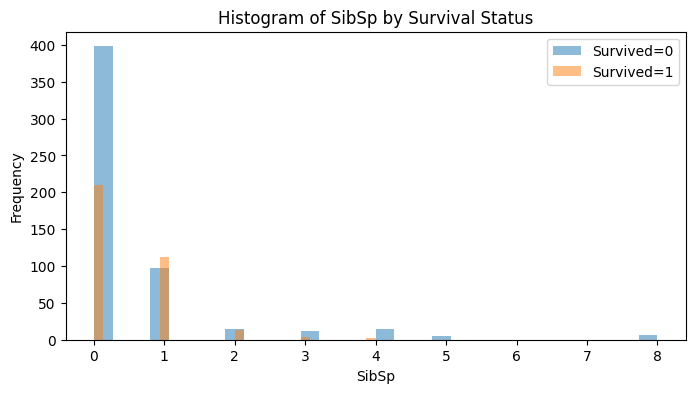

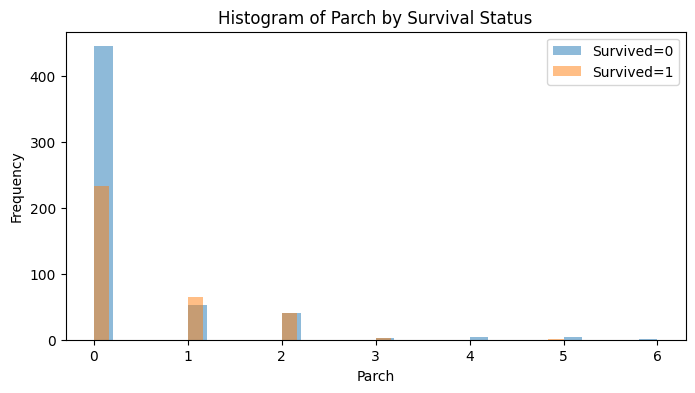

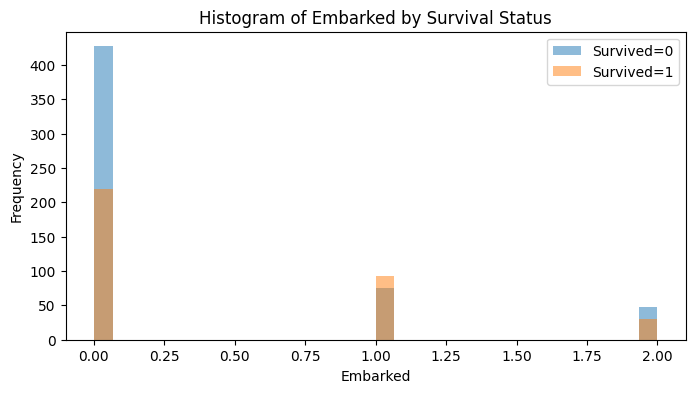

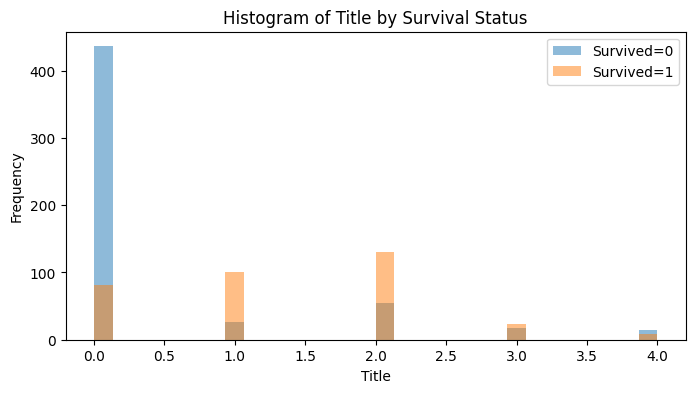

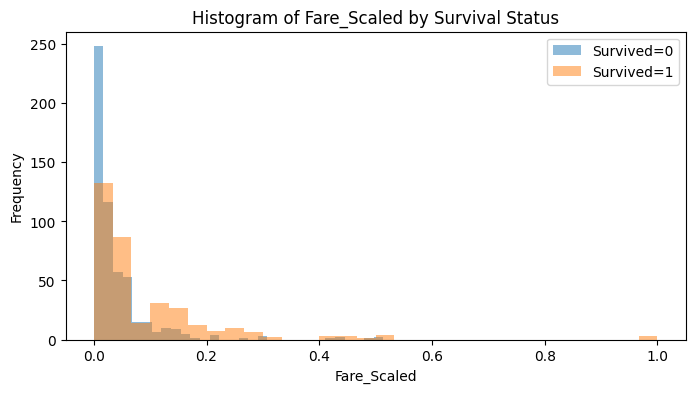

In [25]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    for survival_status in [0, 1]:
        subset = df[df['Survived'] == survival_status]
        plt.hist(subset[column], bins=30, alpha=0.5, label=f"Survived={survival_status}")

    plt.title(f'Histogram of {column} by Survival Status')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Create age-based categorical features

In [26]:
df['Child'] = (df['Age'] < 18).astype(int)
df['Young'] = ((df['Age'] >= 18) & (df['Age'] < 60)).astype(int)
df['Old'] = (df['Age'] >= 60).astype(int)

Drop 'Age' as it is replaced by categories

In [27]:
df.drop(['Age'], axis=1, inplace=True)

Categorize 'Fare_Scaled' into Low,Medium,High

In [28]:
df['Fare_Low'] = (df['Fare_Scaled'] <= 0.33).astype(int)
df['Fare_Medium'] = ((df['Fare_Scaled'] > 0.33) & (df['Fare_Scaled'] <= 0.66)).astype(int)
df['Fare_High'] = (df['Fare_Scaled'] > 0.66).astype(int)

Drop 'Fare_Scaled' as it is replaced by categories

In [30]:
df.drop(['Fare_Scaled'], axis=1, inplace=True)

Updated Plot histogrms of numeric features split by survival status

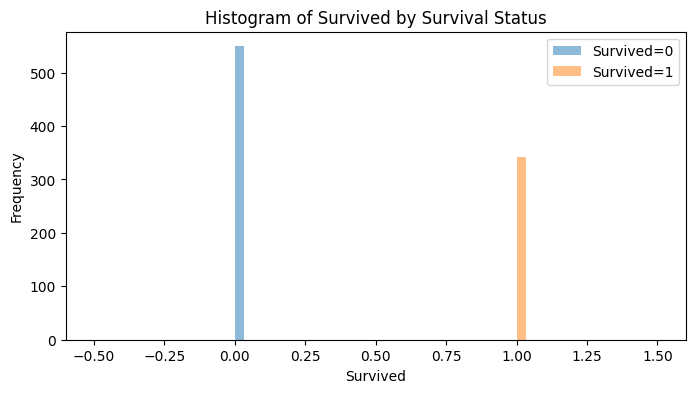

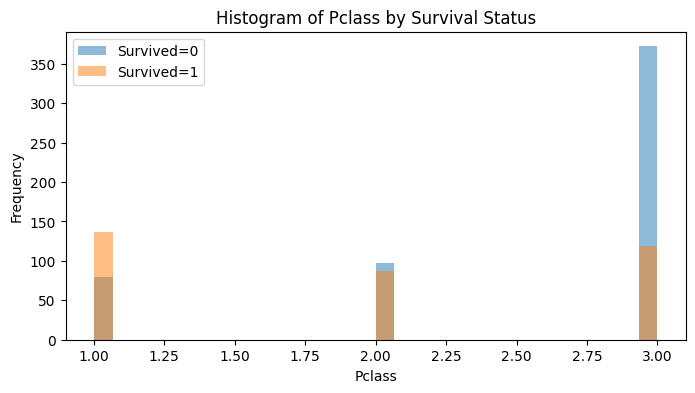

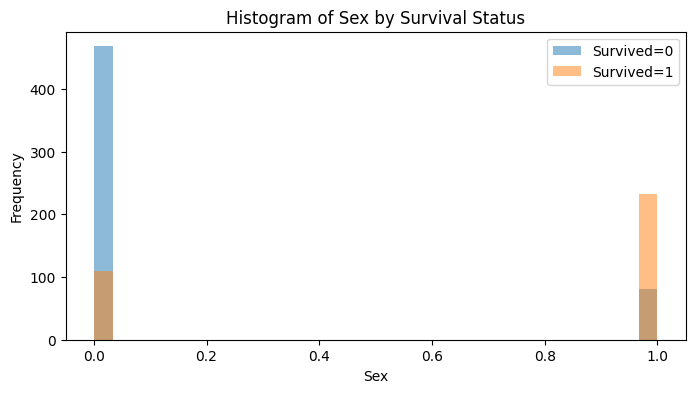

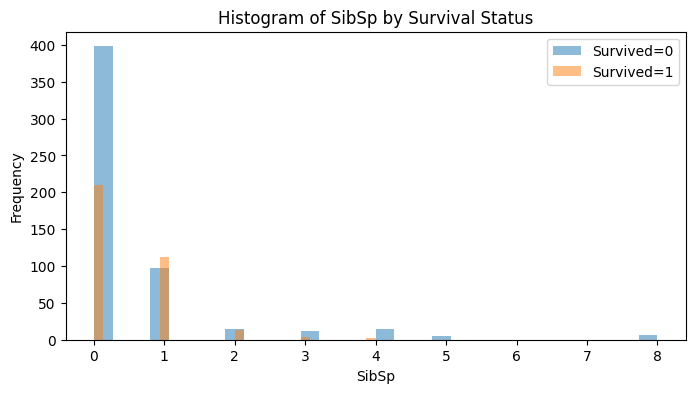

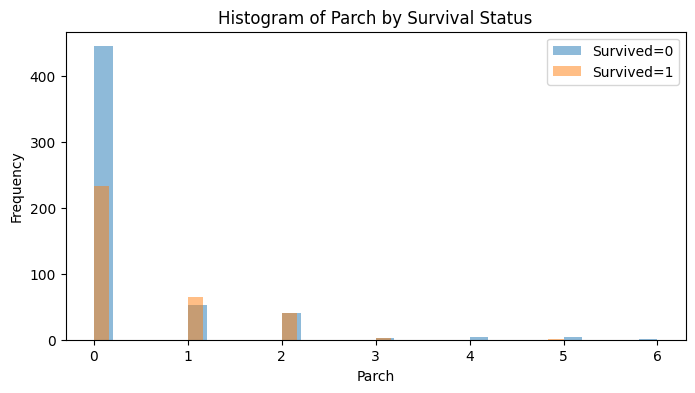

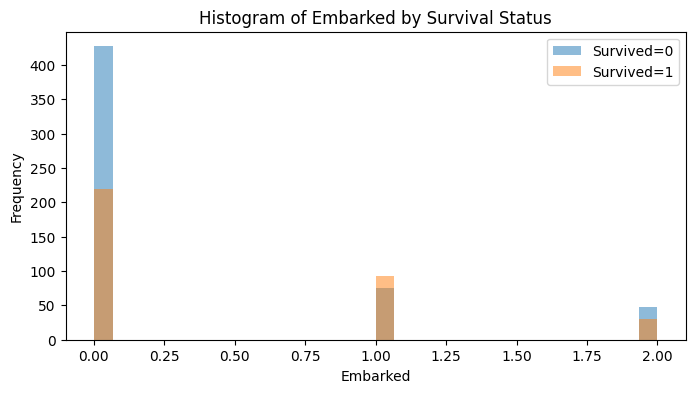

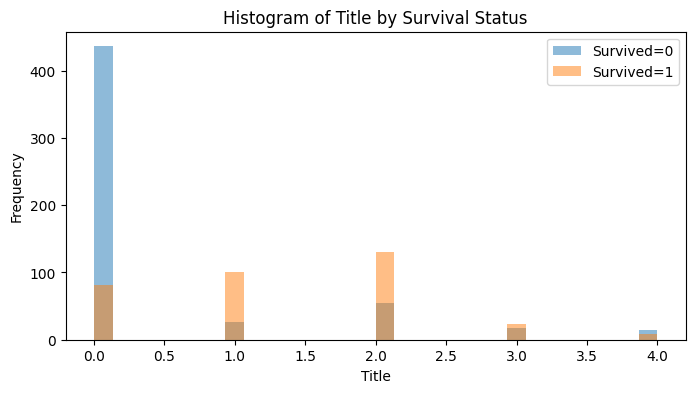

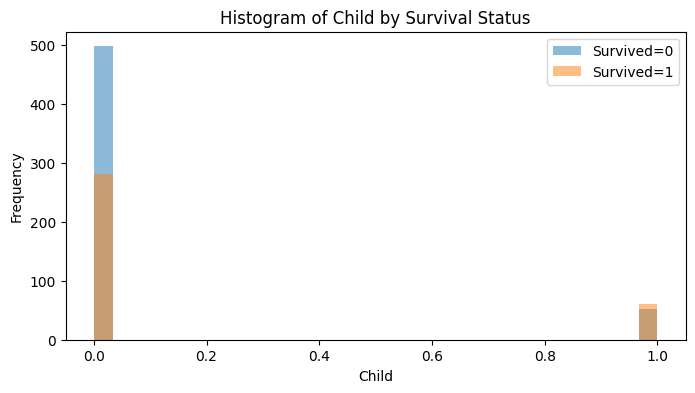

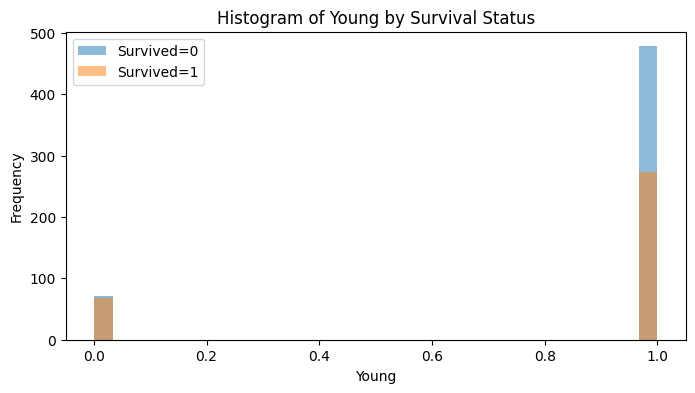

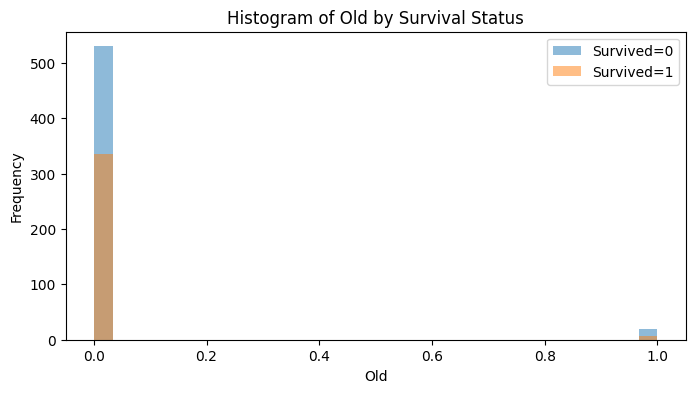

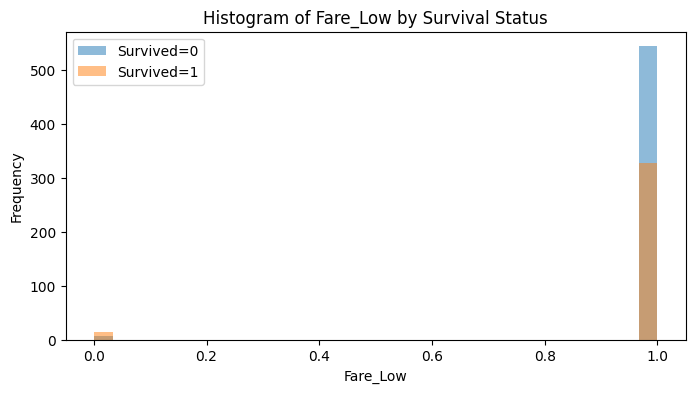

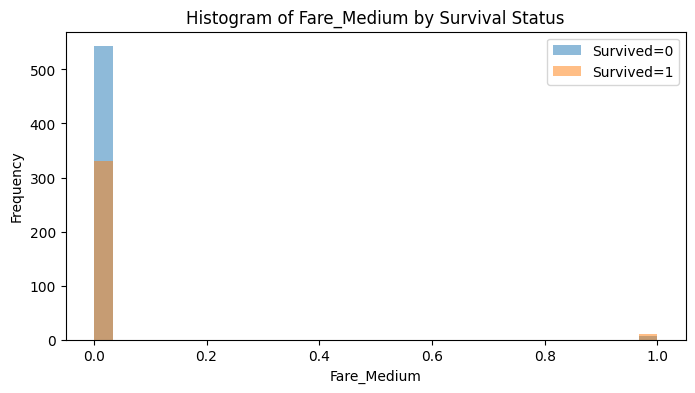

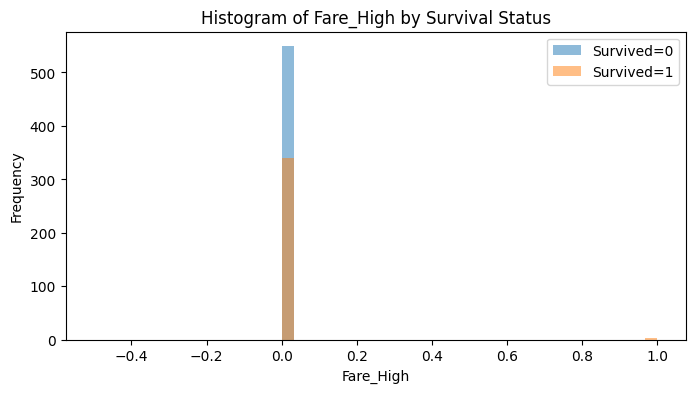

In [31]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    for survival_status in [0, 1]:
        subset = df[df['Survived'] == survival_status]
        plt.hist(subset[column], bins=30, alpha=0.5, label=f"Survived={survival_status}")

    plt.title(f'Histogram of {column} by Survival Status')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Split data into training and testing sets

In [60]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

Standardize features

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train KNN classifier

In [62]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=8)

Evaluate KNN model

In [63]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       174
           1       0.84      0.66      0.74        94

    accuracy                           0.84       268
   macro avg       0.84      0.80      0.81       268
weighted avg       0.84      0.84      0.83       268



Initiate Decision Tree

In [68]:
decision_tree = DecisionTreeClassifier(random_state=10)

Train Decision Tree

In [69]:
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

Evaluate Decision Tree model

In [70]:
print(f"\nDecision Tree Model Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))



Decision Tree Model Accuracy: 0.85

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       174
           1       0.86      0.69      0.76        94

    accuracy                           0.85       268
   macro avg       0.85      0.81      0.83       268
weighted avg       0.85      0.85      0.85       268



Initialize Logistic Regression models

In [77]:
logistic_regression = LogisticRegression(max_iter=5000, random_state=10)

Train Logistic Regression

In [78]:
logistic_regression.fit(X_train, y_train)
y_pred_logreg = logistic_regression.predict(X_test)

Evaluate Logistic Regression model

In [79]:
print(f"\nLogistic Regression Model Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))



Logistic Regression Model Accuracy: 0.81

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       174
           1       0.74      0.72      0.73        94

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



Compare the three model

In [80]:
models = {
    "KNN": y_pred,
    "Decision Tree": y_pred_tree,
    "Logistic Regression": y_pred_logreg
}

# Store metrics
results = {}
for name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='binary')
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

# Print metrics for each model
for model, metrics in results.items():
    print(f"\n{model} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.2f}")



KNN Metrics:
Accuracy: 0.84
Precision: 0.84
Recall: 0.66
F1-Score: 0.74

Decision Tree Metrics:
Accuracy: 0.85
Precision: 0.86
Recall: 0.69
F1-Score: 0.76

Logistic Regression Metrics:
Accuracy: 0.81
Precision: 0.74
Recall: 0.72
F1-Score: 0.73


Bar chart for accuracy comparison

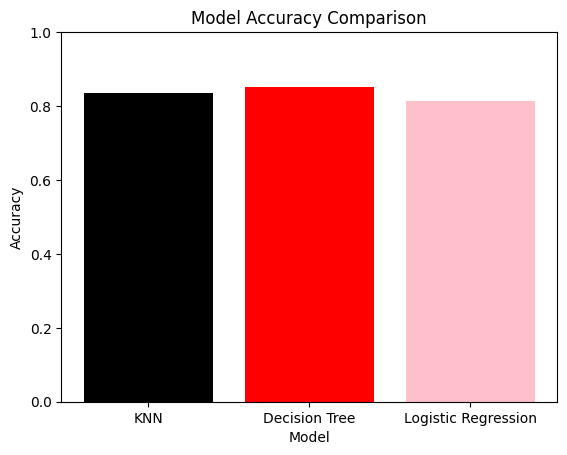

In [81]:
accuracy_scores = [metrics["Accuracy"] for metrics in results.values()]
model_names = list(results.keys())

plt.bar(model_names, accuracy_scores, color=['black', 'red', 'pink'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

 Precision and Recall comparison

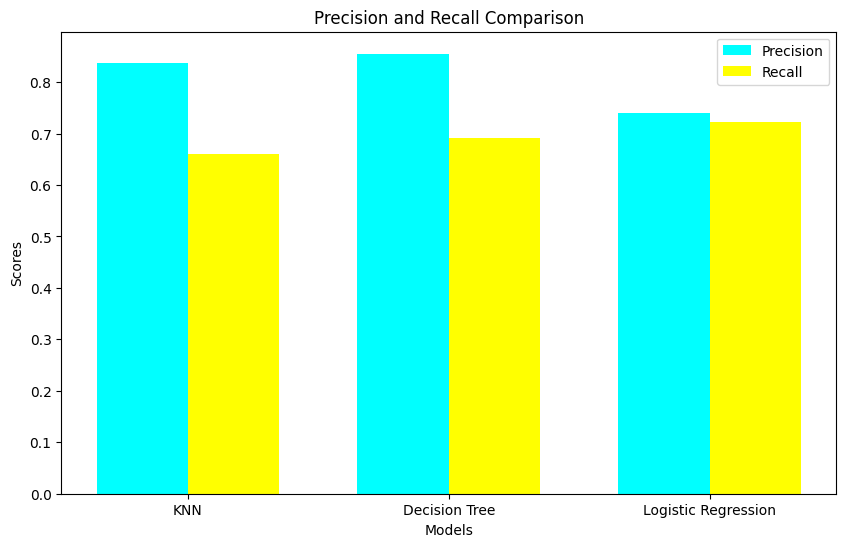

In [82]:
import numpy as np

precision_scores = [metrics["Precision"] for metrics in results.values()]
recall_scores = [metrics["Recall"] for metrics in results.values()]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, precision_scores, width, label='Precision', color='cyan')
bar2 = ax.bar(x + width/2, recall_scores, width, label='Recall', color='yellow')


ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()

Plot confusion matrices

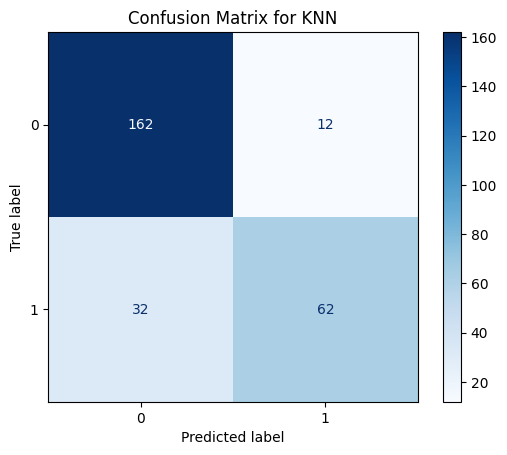

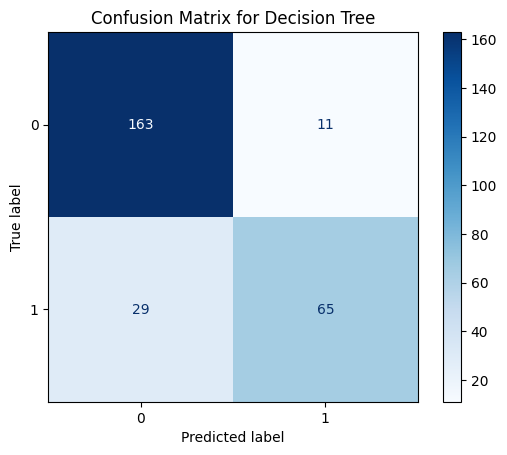

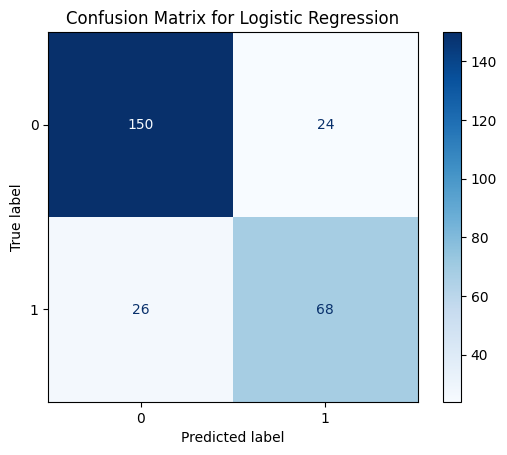

In [83]:
for name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

Bar chart for class imbalance in the 'Survived' feature

<ipython-input-85-d099c1f5f5c9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survived_counts.index, y=survived_counts.values, palette="pastel")


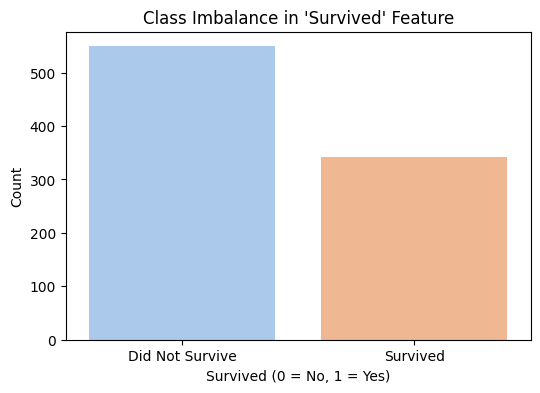

In [85]:

survived_counts = df['Survived'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=survived_counts.index, y=survived_counts.values, palette="pastel")
plt.title("Class Imbalance in 'Survived' Feature")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()
